<a href="https://colab.research.google.com/github/ksasi/EIP/blob/master/EIP4.0/Phase1/Session2%20-%20Assignments/NINE_EIP4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Tue Nov 26 11:18:57 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!python -V

Python 3.6.8


In [0]:
!pip install tensorflow-gpu

In [0]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [0]:
#tf.compat.v1.enable_eager_execution()
tf.compat.v1.disable_eager_execution()

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


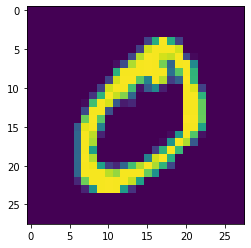

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from tensorflow.keras.layers import Activation
model = Sequential()
 
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(28,28,1), use_bias = False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', use_bias = False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters = 10, kernel_size = (1, 1), activation='relu', use_bias = False)) #22

model.add(MaxPool2D(pool_size=(2, 2)))#11

model.add(Conv2D(filters = 12, kernel_size = (3, 3), activation='relu', use_bias = False))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(filters = 14, kernel_size = (3, 3), activation='relu', use_bias = False))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(filters = 14, kernel_size = (3, 3), activation='relu', use_bias = False))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', use_bias = False))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', use_bias = False))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters = 10, kernel_size = (1, 1), activation='relu', use_bias = False))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters = 10, kernel_size = (2, 2)))
#model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_35 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_32 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_36 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 10)       

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.3 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.3), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.3.
Epoch 1/20
60000/60000 [==============================] - 22s 362us/sample - loss: 0.4035 - accuracy: 0.8648 - val_loss: 0.1279 - val_accuracy: 0.9627

Epoch 00002: LearningRateScheduler reducing learning rate to 0.2274450341.
Epoch 2/20
60000/60000 [==============================] - 18s 303us/sample - loss: 0.1754 - accuracy: 0.9352 - val_loss: 0.0398 - val_accuracy: 0.9882

Epoch 00003: LearningRateScheduler reducing learning rate to 0.1831501832.
Epoch 3/20
60000/60000 [==============================] - 18s 302us/sample - loss: 0.1469 - accuracy: 0.9419 - val_loss: 0.0336 - val_accuracy: 0.9904

Epoch 00004: LearningRateScheduler reducing learning rate to 0.153295861.
Epoch 4/20
60000/60000 [==============================] - 18s 302us/sample - loss: 0.1332 - accuracy: 0.9455 - val_loss: 0.0313 - val_accuracy: 0.9917

Epoch 00005: LearningRateScheduler reducing learnin

In [0]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.020760589016037556, 0.9943]
